In [1]:
import numpy as np
from datasets.graph import load_graph

#filepath = '/data/gnn_code/heptrkx-gnn-tracking/output_atlas/event100000001_g000.npz'
filepath = '/data/gnn_code/heptrkx-gnn-tracking/output/event000001000_g000.npz'
# filepath = '/data/gnn_code/training_data/all_track_lowpt_id/raw/event000001000_g000.npz'
# filepath = '/data/gnn_code/training_data/detector_pt2.0_intersect/raw/event000001000_g000.npz'

g = load_graph(filepath)

n_nodes = g.Ro[2]
n_edges = g.Ro[3]

print('nodes = ' + str(n_nodes))
print('edges = ' + str(n_edges))

X = g.X
y = g.y



Ro_flat = g.Ro[0][0][np.argsort(g.Ro[0][1])]           
Ri_flat = g.Ri[0][0][np.argsort(g.Ri[0][1])]                       
Ro_flat_false = Ro_flat[y < 1]
Ri_flat_false = Ri_flat[y < 1]
Ro_flat_true = Ro_flat[y > 0]
Ri_flat_true = Ri_flat[y > 0]


width1 = .1
width2 = .2
points = .25

#TrackML Barrel
#R_max = 1050
#Z_max = 1200

#TrackML Barrel: Inner Detector
#R_max = 200
#Z_max = 600

#TrackML Barrel/Endcap: Inner Detector
R_max = 200
#R_max = 35000
Z_max = 1600
#Z_max = 17500


#ATLAS Barrel: Inner Detector
#R_max = 300
#Z_max = 400

#ATLAS Barrel
#R_max = 1050
#Z_max = 1500


    

R_coordinate = np.zeros(n_nodes)
Z_coordinate = np.zeros(n_nodes)
Phi_coordinate = np.zeros(n_nodes)
X_coordinate = np.zeros(n_nodes)
Y_coordinate = np.zeros(n_nodes)

for i in range(n_nodes):
    R_coordinate[i] = 1000*X[i][0]
    Phi_coordinate[i] = np.pi*X[i][1]
    Z_coordinate[i] = 1000*X[i][2]
    X_coordinate[i] = 1000*X[i][0]*np.cos(np.pi*X[i][1])
    Y_coordinate[i] = 1000*X[i][0]*np.sin(np.pi*X[i][1])
    
delta_R   = np.zeros(n_edges)
delta_Z   = np.zeros(n_edges)
delta_phi = np.zeros(n_edges)
Z0        = np.zeros(n_edges)


for i in range(n_edges):
    delta_R[i]   = R_coordinate[Ri_flat[i]] - R_coordinate[Ro_flat[i]]
    delta_Z[i]   = Z_coordinate[Ri_flat[i]] - Z_coordinate[Ro_flat[i]]
    Z0[i]      = Z_coordinate[Ri_flat[i]] - R_coordinate[Ri_flat[i]] * delta_Z[i] / delta_R[i]
    delta_phi[i] = abs(Phi_coordinate[Ri_flat[i]] - Phi_coordinate[Ro_flat[i]])
    if delta_phi[i] > np.pi:
        delta_phi[i] = abs(delta_phi[i] - 2*np.pi)

phi_slope = abs(delta_phi/delta_R)
        
    
Ro_flat_largeR = Ro_flat[delta_R > 60]
Ri_flat_largeR = Ri_flat[delta_R > 60]

delta_R_true = delta_R[y > 0]
delta_R_false = delta_R[y < 1]
phi_slope_true  = phi_slope[y > 0]
phi_slope_false = phi_slope[y < 1]
z0_true  = Z0[y > 0]
z0_false = Z0[y < 1]

# phi_slope_true_l1 = phi_slope_true[delta_R_true < 42.4]
# phi_slope_true_l2 = phi_slope_true[np.logical_and(delta_R_true > 42.4, delta_R_true < 50)]
# phi_slope_true_l3 = phi_slope_true[delta_R_true > 50]

# phi_slope_false_l1 = phi_slope_false[delta_R_false < 42.4]
# phi_slope_false_l2 = phi_slope_false[np.logical_and(delta_R_false > 42.4, delta_R_false < 50)]
# phi_slope_false_l3 = phi_slope_false[delta_R_false > 50]

phi_slope_true_l1 = phi_slope_true[delta_R_true < 4000]
phi_slope_true_l2 = phi_slope_true[np.logical_and(delta_R_true > 4000, delta_R_true < 8000)]
phi_slope_true_l3 = phi_slope_true[delta_R_true > 8000]

phi_slope_false_l1 = phi_slope_false[delta_R_false < 4000]
phi_slope_false_l2 = phi_slope_false[np.logical_and(delta_R_false > 4000, delta_R_false < 8000)]
phi_slope_false_l3 = phi_slope_false[delta_R_false > 8000]

nodes = 1284
edges = 186171


In [2]:
def draw_sample(x_coord, x_lab, x_min, x_max, y_coord, y_lab, y_min, y_max):
    import matplotlib.pyplot as plt
#     fig, (ax0,ax1,ax2) = plt.subplots(3, 1, dpi=400, figsize=(10, 30))
    fig, (ax0) = plt.subplots(1, 1, dpi=400, figsize=(5, 5))

    # Adjust axes
    ax0.set_xlabel(x_lab)
    ax0.set_ylabel(y_lab)
    ax0.set_xlim(x_min, x_max)
    ax0.set_ylim(y_min, y_max)
#     ax1.set_xlabel(x_lab)
#     ax1.set_ylabel(y_lab)
#     ax1.set_xlim(x_min, x_max)
#     ax1.set_ylim(y_min, y_max)
#     ax2.set_xlabel(x_lab)
#     ax2.set_ylabel(y_lab)
#     ax2.set_xlim(x_min, x_max)
#     ax2.set_ylim(y_min, y_max)

    #plot points
    ax0.scatter(x_coord, y_coord, s=points, c='k')
#     ax1.scatter(x_coord, y_coord, s=points, c='k')
#     ax2.scatter(x_coord, y_coord, s=points, c='k')

    #Draw Edges
#     ax0.plot([x_coord[Ro_flat.astype(int)], x_coord[Ri_flat.astype(int)]],
#              [y_coord[Ro_flat.astype(int)], y_coord[Ri_flat.astype(int)]],
#              '-', c='blue', linewidth=width1)
#     ax1.plot([x_coord[Ro_flat_true.astype(int)], x_coord[Ri_flat_true.astype(int)]],
#              [y_coord[Ro_flat_true.astype(int)], y_coord[Ri_flat_true.astype(int)]],
#              '-', c='black', linewidth=width2)
    ax0.plot([x_coord[Ro_flat_false.astype(int)], x_coord[Ri_flat_false.astype(int)]],
             [y_coord[Ro_flat_false.astype(int)], y_coord[Ri_flat_false.astype(int)]],
             '-', c='blue', linewidth=width1)
    ax0.plot([x_coord[Ro_flat_true.astype(int)], x_coord[Ri_flat_true.astype(int)]],
             [y_coord[Ro_flat_true.astype(int)], y_coord[Ri_flat_true.astype(int)]],
             '-', c='black', linewidth=width2)
#     ax2.plot([x_coord[Ro_flat_largeR.astype(int)], x_coord[Ri_flat_largeR.astype(int)]],
#              [y_coord[Ro_flat_largeR.astype(int)], y_coord[Ri_flat_largeR.astype(int)]],
#              '-', c='black', linewidth=width2)

Text(0, 0.5, '# Edges')

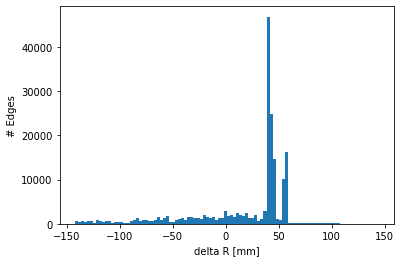

In [3]:
from matplotlib import pyplot as plt

plt.hist(delta_R, 100)
plt.xlabel("delta R [mm]")
plt.ylabel("# Edges")


R_min1 = 30.48582561314106
R_max1 = 101.38902068138123
R_min2 = 104.75017875432968
R_max2 = 175.91357231140137
Z_mean Layer  0 = -1499.272736636075
Z_mean Layer  1 = -1299.8653925382173
Z_mean Layer  2 = -1099.2941330460942
Z_mean Layer  3 = -958.9594554256748
Z_mean Layer  4 = -819.3181929263202
Z_mean Layer  5 = -698.9893672314096
Z_mean Layer  6 = -598.6037782902988
Z_mean Layer  7 = 598.7446878818755
Z_mean Layer  8 = 698.8953504451486
Z_mean Layer  9 = 818.8625082373619
Z_mean Layer 10 = 958.9594538147385
Z_mean Layer 11 = 1098.959468506478
Z_mean Layer 12 = 1299.4558916372412
Z_mean Layer 13 = 1499.574069623594


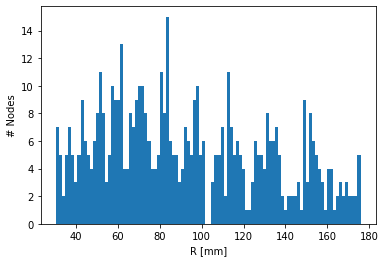

In [4]:
from matplotlib import pyplot as plt

plt.hist(R_coordinate[np.logical_or(Z_coordinate > 500, Z_coordinate < -500)], 100)
plt.xlabel("R [mm]")
plt.ylabel("# Nodes")
print("R_min1 = " + str(R_coordinate[R_coordinate < 103].min()))
print("R_max1 = " + str(R_coordinate[R_coordinate < 103].max()))

print("R_min2 = " + str(R_coordinate[R_coordinate > 103].min()))
print("R_max2 = " + str(R_coordinate[R_coordinate > 103].max()))

print("Z_mean Layer  0 = " + str(Z_coordinate[np.logical_and(Z_coordinate > -1600, Z_coordinate < -1400)].mean()))
print("Z_mean Layer  1 = " + str(Z_coordinate[np.logical_and(Z_coordinate > -1400, Z_coordinate < -1200)].mean()))
print("Z_mean Layer  2 = " + str(Z_coordinate[np.logical_and(Z_coordinate > -1200, Z_coordinate < -1000)].mean()))
print("Z_mean Layer  3 = " + str(Z_coordinate[np.logical_and(Z_coordinate > -1000, Z_coordinate <  -900)].mean()))
print("Z_mean Layer  4 = " + str(Z_coordinate[np.logical_and(Z_coordinate >  -900, Z_coordinate <  -800)].mean()))
print("Z_mean Layer  5 = " + str(Z_coordinate[np.logical_and(Z_coordinate >  -800, Z_coordinate <  -650)].mean()))
print("Z_mean Layer  6 = " + str(Z_coordinate[np.logical_and(Z_coordinate >  -650, Z_coordinate <  -550)].mean()))
print("Z_mean Layer  7 = " + str(Z_coordinate[np.logical_and(Z_coordinate >   550, Z_coordinate <   650)].mean()))
print("Z_mean Layer  8 = " + str(Z_coordinate[np.logical_and(Z_coordinate >   650, Z_coordinate <   800)].mean()))
print("Z_mean Layer  9 = " + str(Z_coordinate[np.logical_and(Z_coordinate >   800, Z_coordinate <   900)].mean()))
print("Z_mean Layer 10 = " + str(Z_coordinate[np.logical_and(Z_coordinate >   900, Z_coordinate <  1000)].mean()))
print("Z_mean Layer 11 = " + str(Z_coordinate[np.logical_and(Z_coordinate >  1000, Z_coordinate <  1200)].mean()))
print("Z_mean Layer 12 = " + str(Z_coordinate[np.logical_and(Z_coordinate >  1200, Z_coordinate <  1400)].mean()))
print("Z_mean Layer 13 = " + str(Z_coordinate[np.logical_and(Z_coordinate >  1400, Z_coordinate <  1600)].mean()))


Z_min = -486.2059950828552
Z_max = 480.1960289478302
R_mean Layer0 = 32.360736526689436
R_mean Layer1 = 71.09980313728254
R_mean Layer2 = 114.6941149431001
R_mean Layer3 = 171.2387068153814


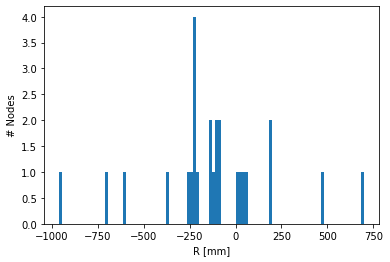

In [5]:
from matplotlib import pyplot as plt

# plt.hist(R_coordinate, 100)
plt.hist(Z_coordinate[np.logical_and(R_coordinate >  71.25, R_coordinate <  71.5)], 100)
plt.xlabel("R [mm]")
plt.ylabel("# Nodes")
print("Z_min = " + str(Z_coordinate[np.logical_and(Z_coordinate > -500, Z_coordinate < 500)].min()))
print("Z_max = " + str(Z_coordinate[np.logical_and(Z_coordinate > -500, Z_coordinate < 500)].max()))
print("R_mean Layer0 = " + str(R_coordinate[np.logical_and(R_coordinate >   0, R_coordinate <  40)].mean()))
print("R_mean Layer1 = " + str(R_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)].mean()))
print("R_mean Layer2 = " + str(R_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)].mean()))
print("R_mean Layer3 = " + str(R_coordinate[np.logical_and(R_coordinate > 160, R_coordinate < 180)].mean()))


30.48582561314106
-597.5000262260437
31.934428960084915


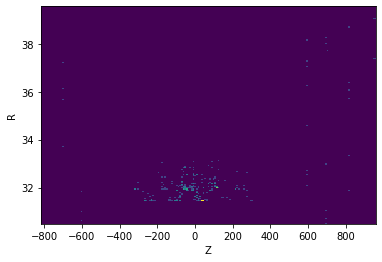

In [6]:
from matplotlib import pyplot as plt
plt.hist2d(Z_coordinate[np.logical_and(R_coordinate >  20, R_coordinate <  40)], 
           R_coordinate[np.logical_and(R_coordinate >  20, R_coordinate <  40)], 
           200)
plt.xlabel("Z")
plt.ylabel("R")

print(R_coordinate[np.logical_and(R_coordinate >  20, R_coordinate <  40)].min())
print(Z_coordinate[np.logical_and(R_coordinate > 31.5, R_coordinate < 31.9)].min())

tempR = R_coordinate[np.logical_and(R_coordinate >  20, R_coordinate <  40)]
tempZ = Z_coordinate[np.logical_and(R_coordinate >  20, R_coordinate <  40)]
print(tempR[np.logical_and(tempZ > -65, tempZ < -5)].min())

Text(0, 0.5, 'R')

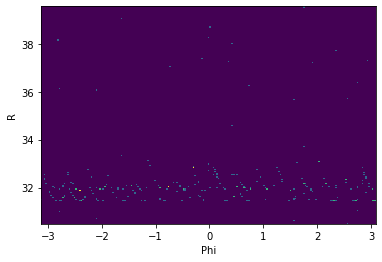

In [7]:
from matplotlib import pyplot as plt
plt.hist2d(Phi_coordinate[np.logical_and(R_coordinate >  20, R_coordinate <  40)], 
           R_coordinate[np.logical_and(R_coordinate >  20, R_coordinate <  40)], 
           200)
plt.xlabel("Phi")
plt.ylabel("R")

60.166724026203156
-957.4999809265137
71.564219892025


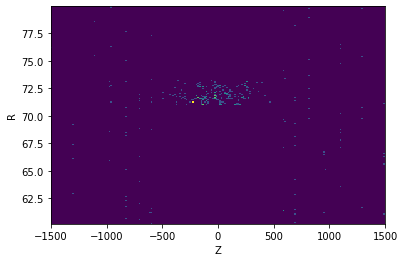

In [8]:
from matplotlib import pyplot as plt
plt.hist2d(Z_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)], 
           R_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)], 
           200)
plt.xlabel("Z")
plt.ylabel("R")

print(R_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)].min())
print(Z_coordinate[np.logical_and(R_coordinate >  71.1, R_coordinate <  71.5)].min())

tempR = R_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)]
tempZ = Z_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)]
print(tempR[np.logical_and(tempZ > -65, tempZ < -5)].min())

Text(0, 0.5, 'R')

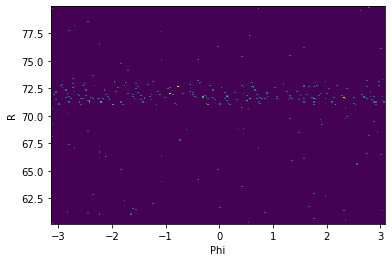

In [9]:
from matplotlib import pyplot as plt
plt.hist2d(Phi_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)], 
           R_coordinate[np.logical_and(R_coordinate >  60, R_coordinate <  80)], 
           200)
plt.xlabel("Phi")
plt.ylabel("R")

100.04270076751709
-958.0000042915344
115.39679765701294


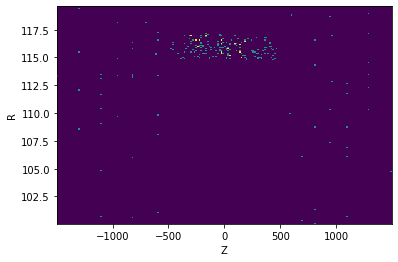

In [10]:
from matplotlib import pyplot as plt
plt.hist2d(Z_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)], 
           R_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)], 
           200)
plt.xlabel("Z")
plt.ylabel("R")

print(R_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)].min())
print(Z_coordinate[np.logical_and(R_coordinate > 114.9, R_coordinate < 115.3)].min())

tempR = R_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)]
tempZ = Z_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)]
print(tempR[np.logical_and(tempZ > -65, tempZ < -5)].min())

Text(0, 0.5, 'R')

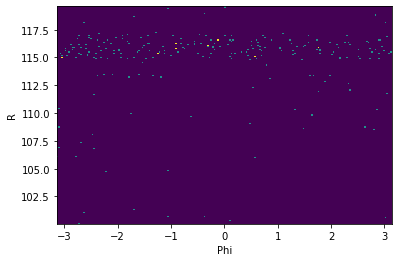

In [11]:
from matplotlib import pyplot as plt
plt.hist2d(Phi_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)], 
           R_coordinate[np.logical_and(R_coordinate > 100, R_coordinate < 120)], 
           200)
plt.xlabel("Phi")
plt.ylabel("R")

Text(0, 0.5, '# Edges')

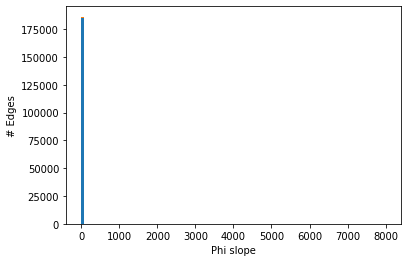

In [12]:
from matplotlib import pyplot as plt
plt.hist((phi_slope_false, phi_slope_true), 100, stacked=True)
#plt.hist((phi_slope_true), 100, (0, phi_max), stacked=True)
plt.xlabel("Phi slope")
plt.ylabel("# Edges")

In [13]:
print(len(phi_slope_true), len(phi_slope_false))

988 185183


Text(0, 0.5, '# Edges')

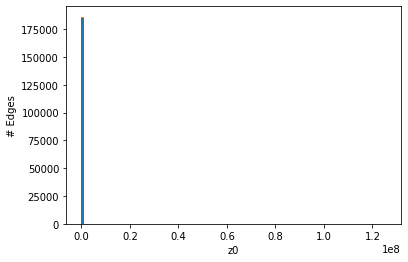

In [14]:
from matplotlib import pyplot as plt
plt.hist((abs(z0_false), abs(z0_true)), 100, stacked=True)
plt.xlabel("z0")
plt.ylabel("# Edges")

Text(0, 0.5, 'phi slope')

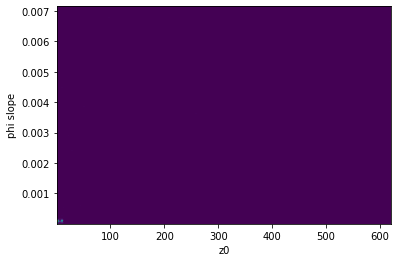

In [15]:
from matplotlib import pyplot as plt
plt.hist2d(abs(z0_true), phi_slope_true, 200)
plt.xlabel("z0")
plt.ylabel("phi slope")

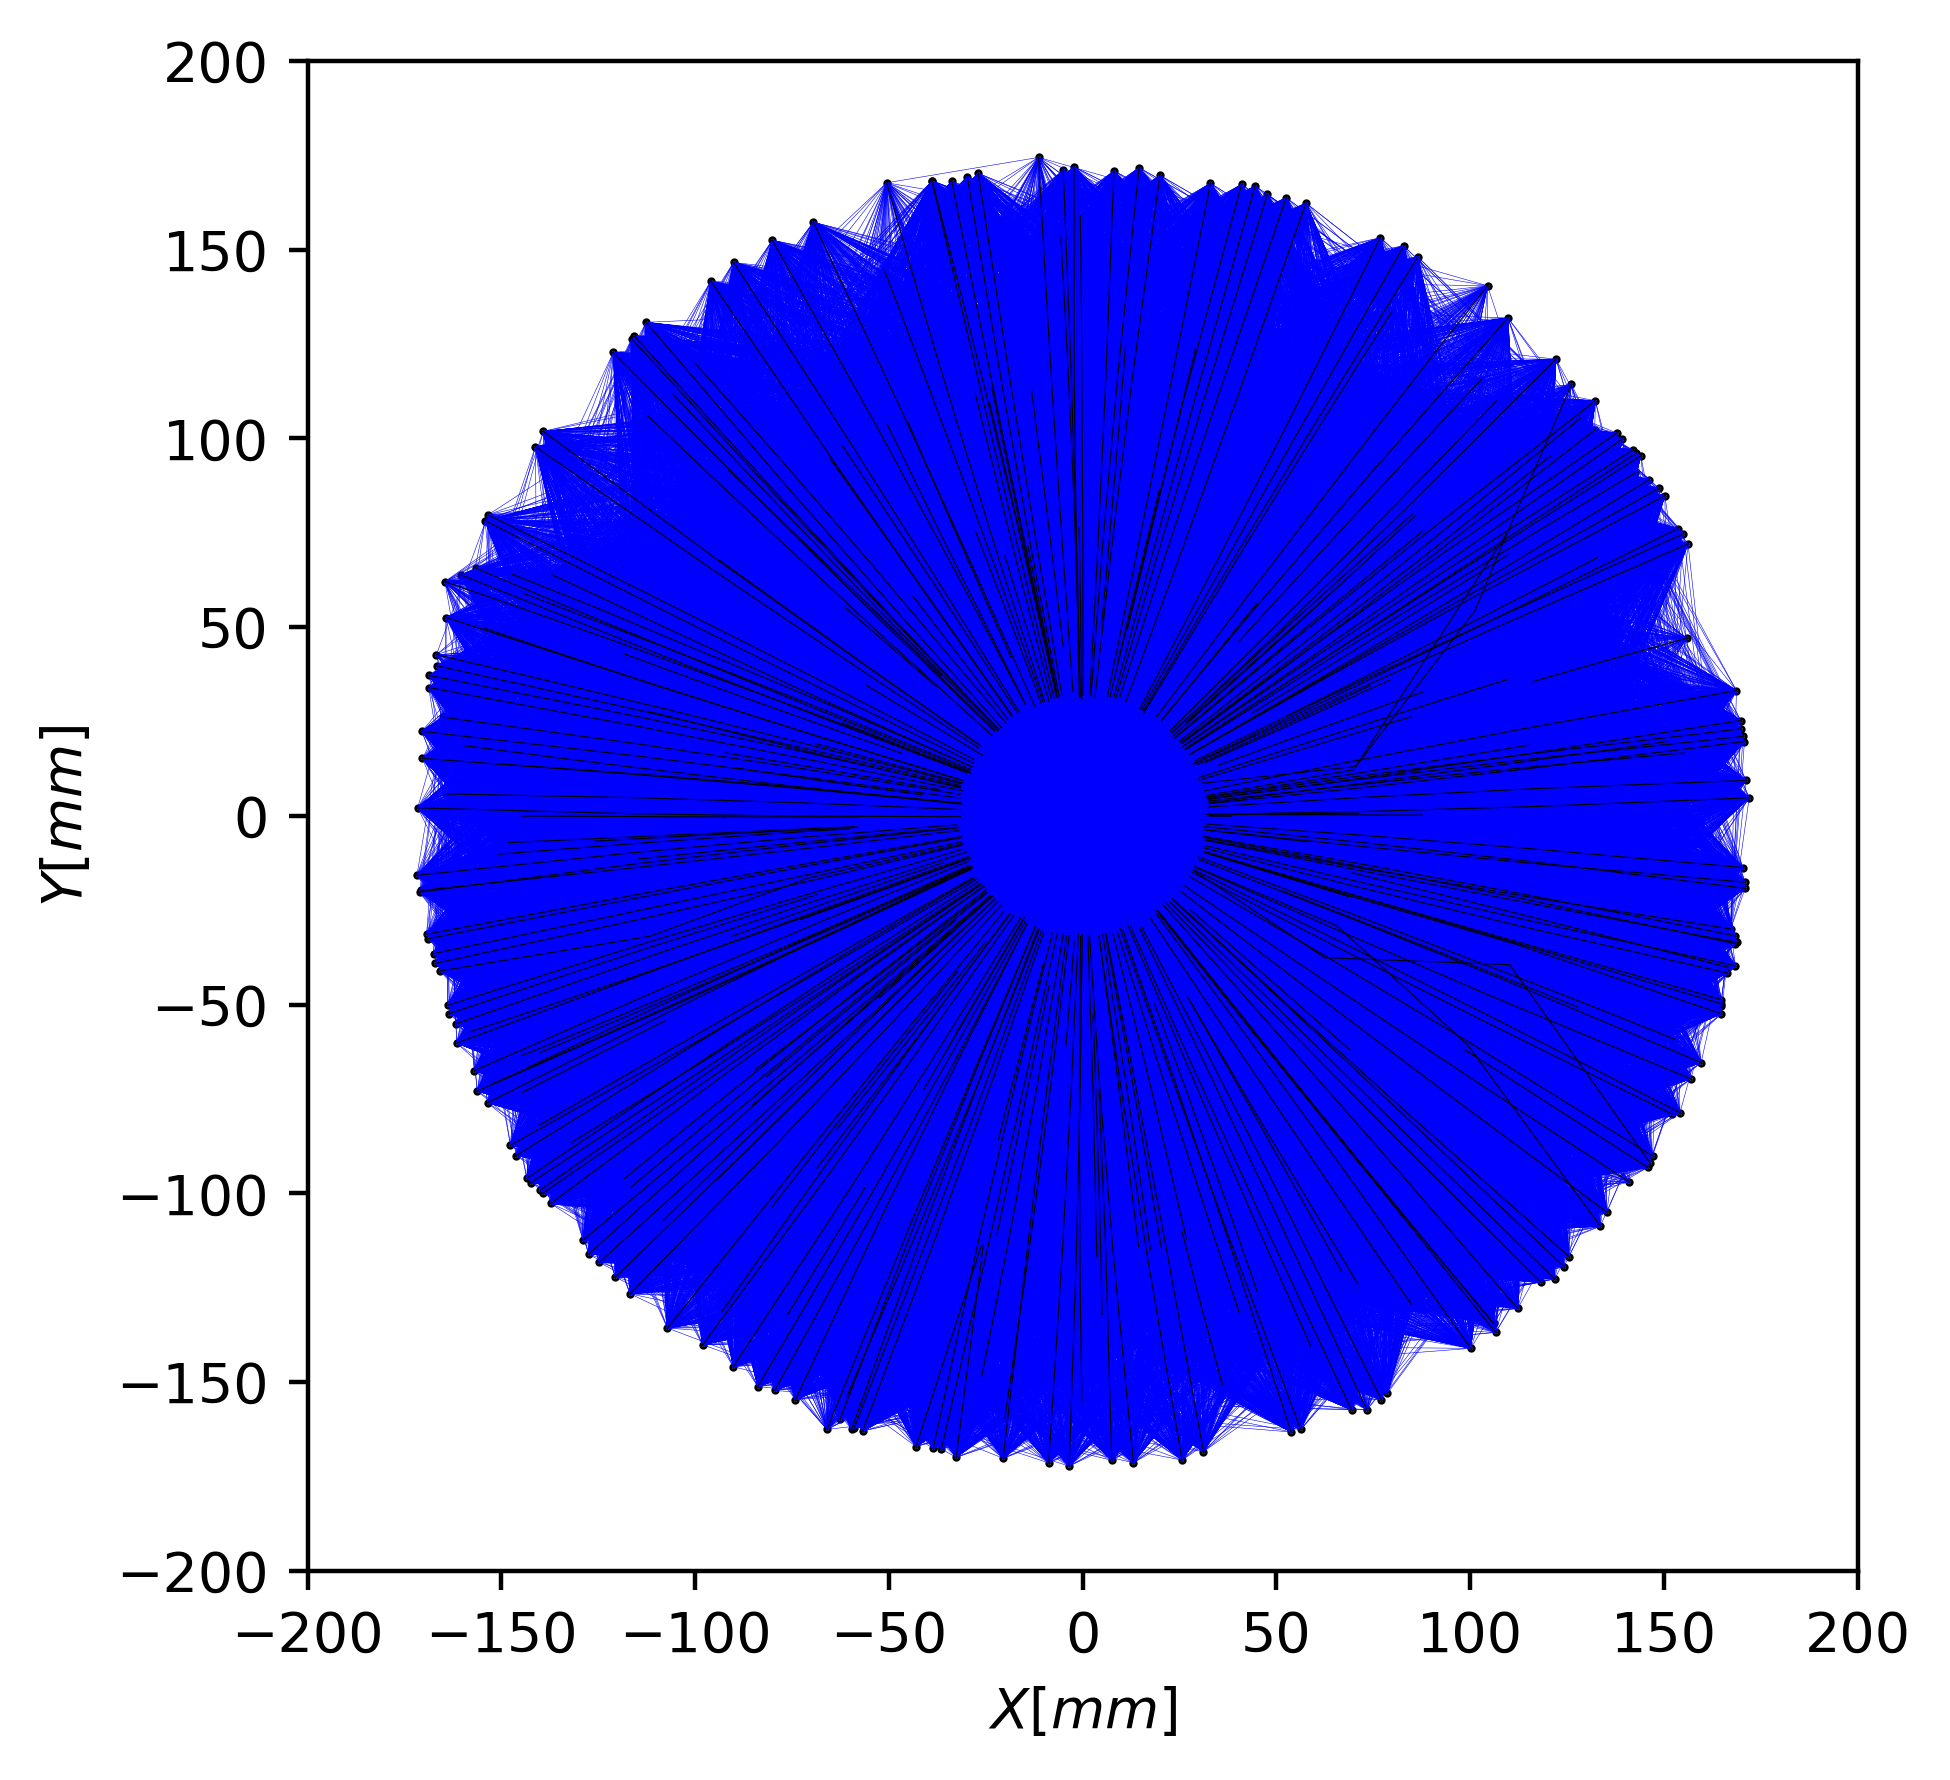

In [16]:
draw_sample(X_coordinate, '$X [mm]$', -R_max, R_max, 
            Y_coordinate, '$Y [mm]$', -R_max, R_max)

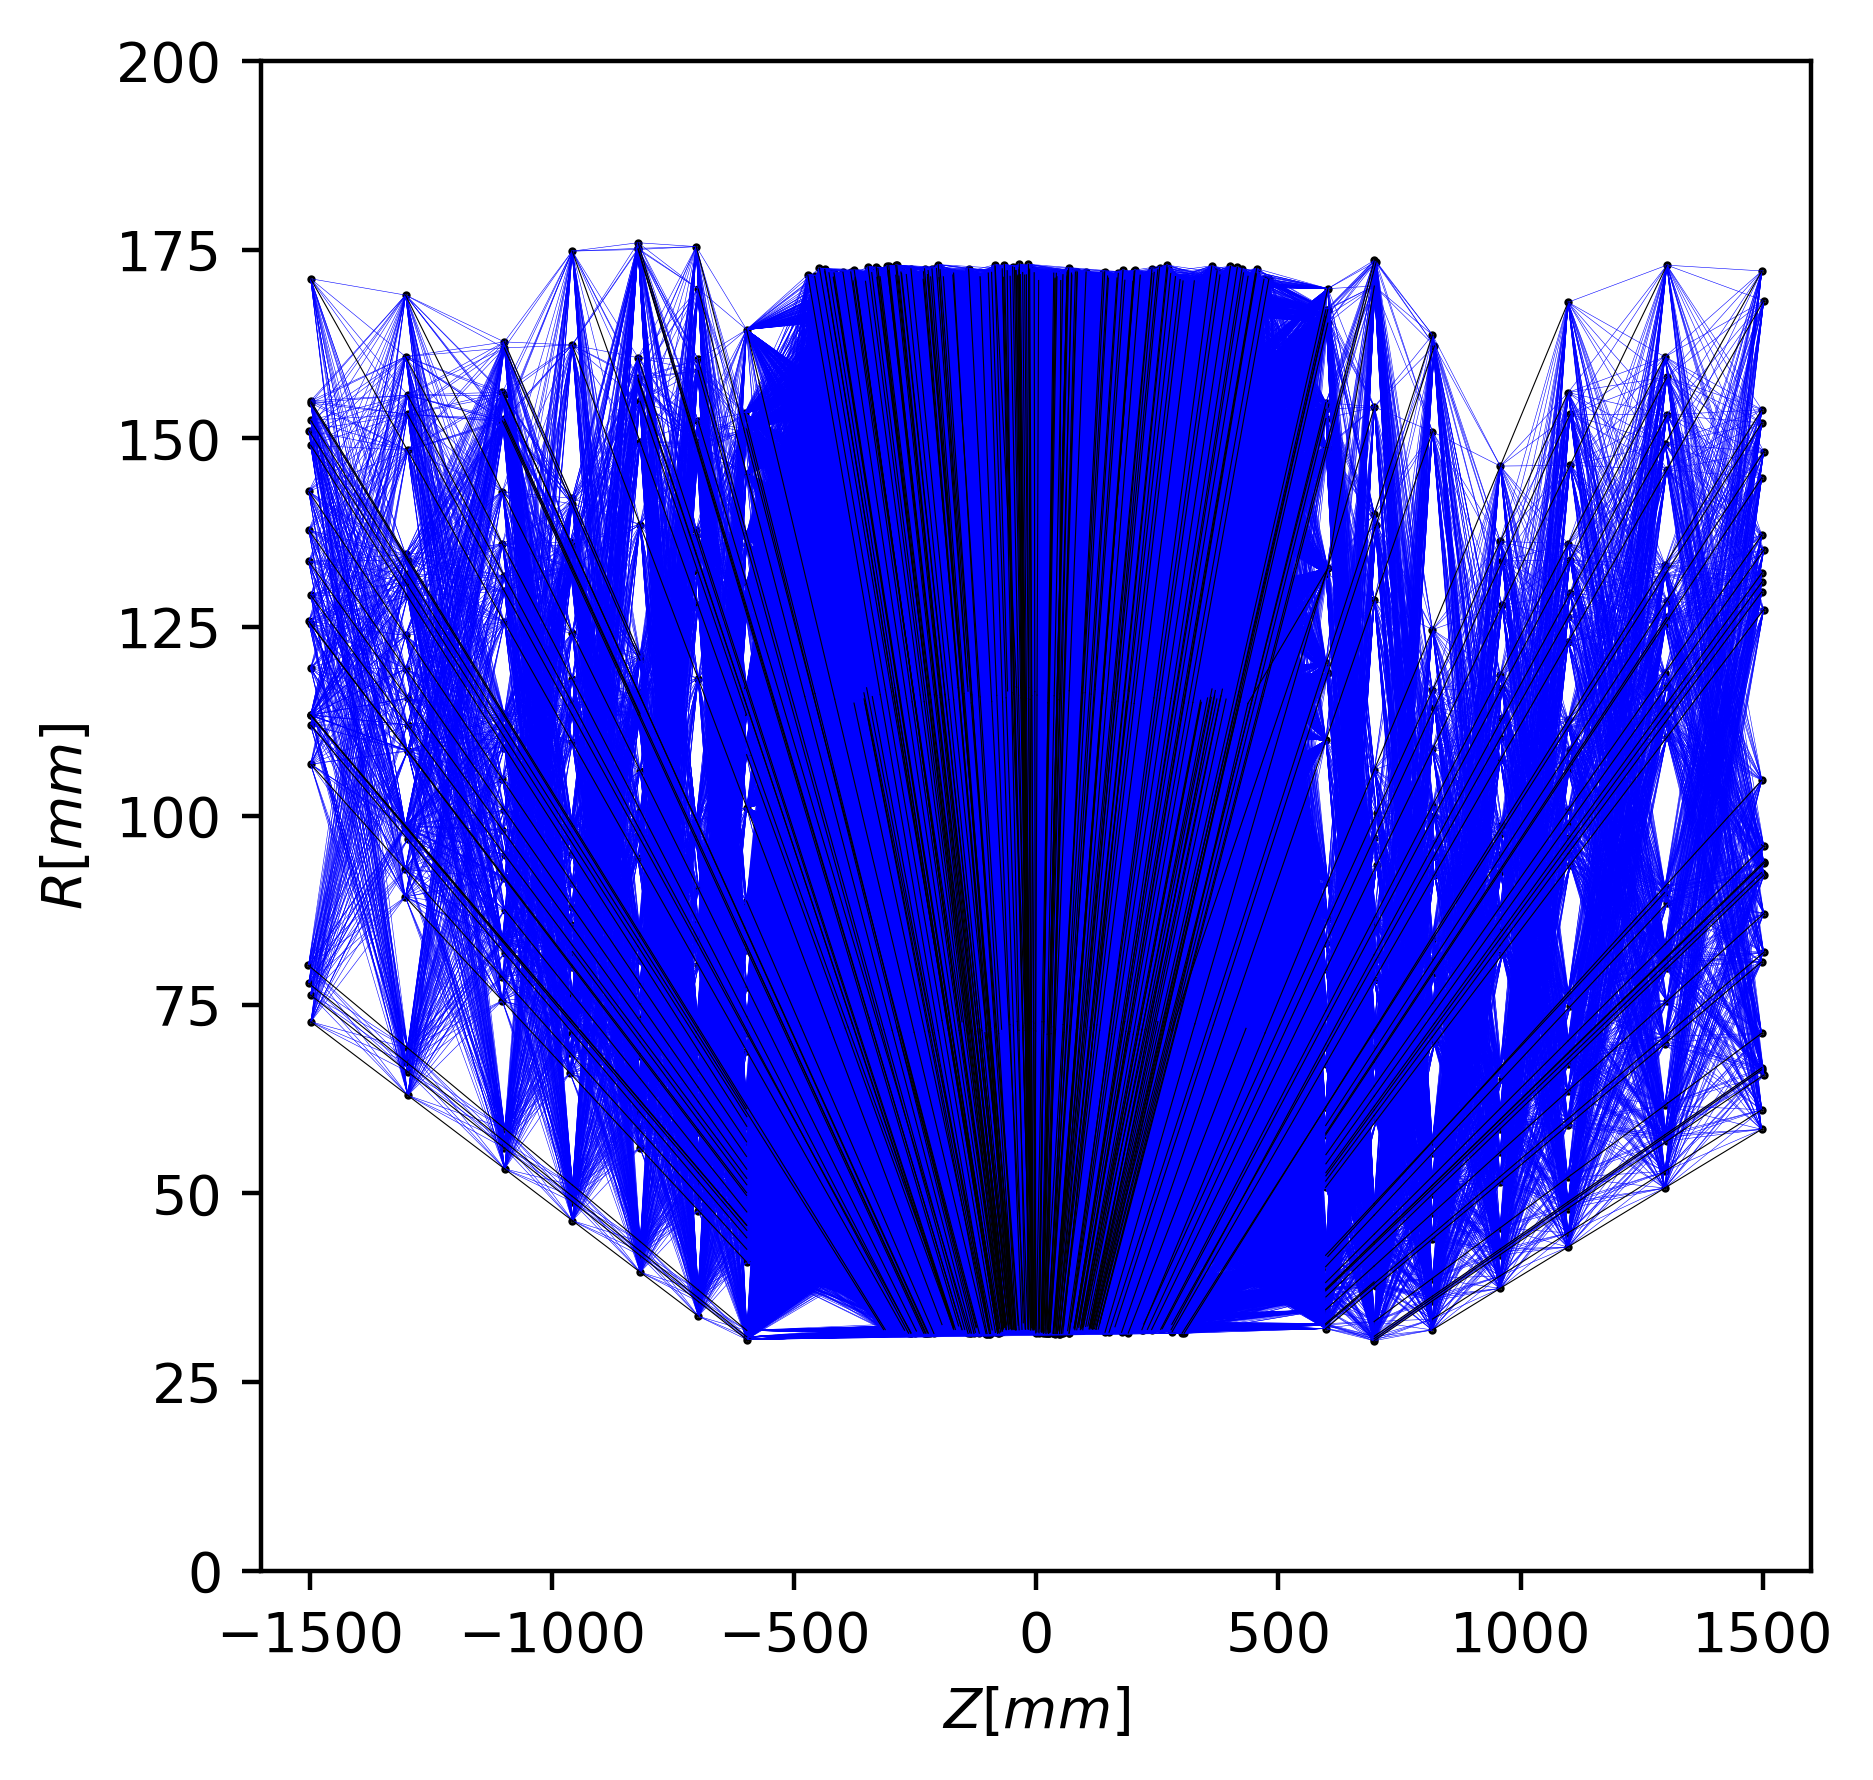

In [17]:
draw_sample(Z_coordinate, '$Z [mm]$', -Z_max, Z_max, 
            R_coordinate, '$R [mm]$', 0, R_max)

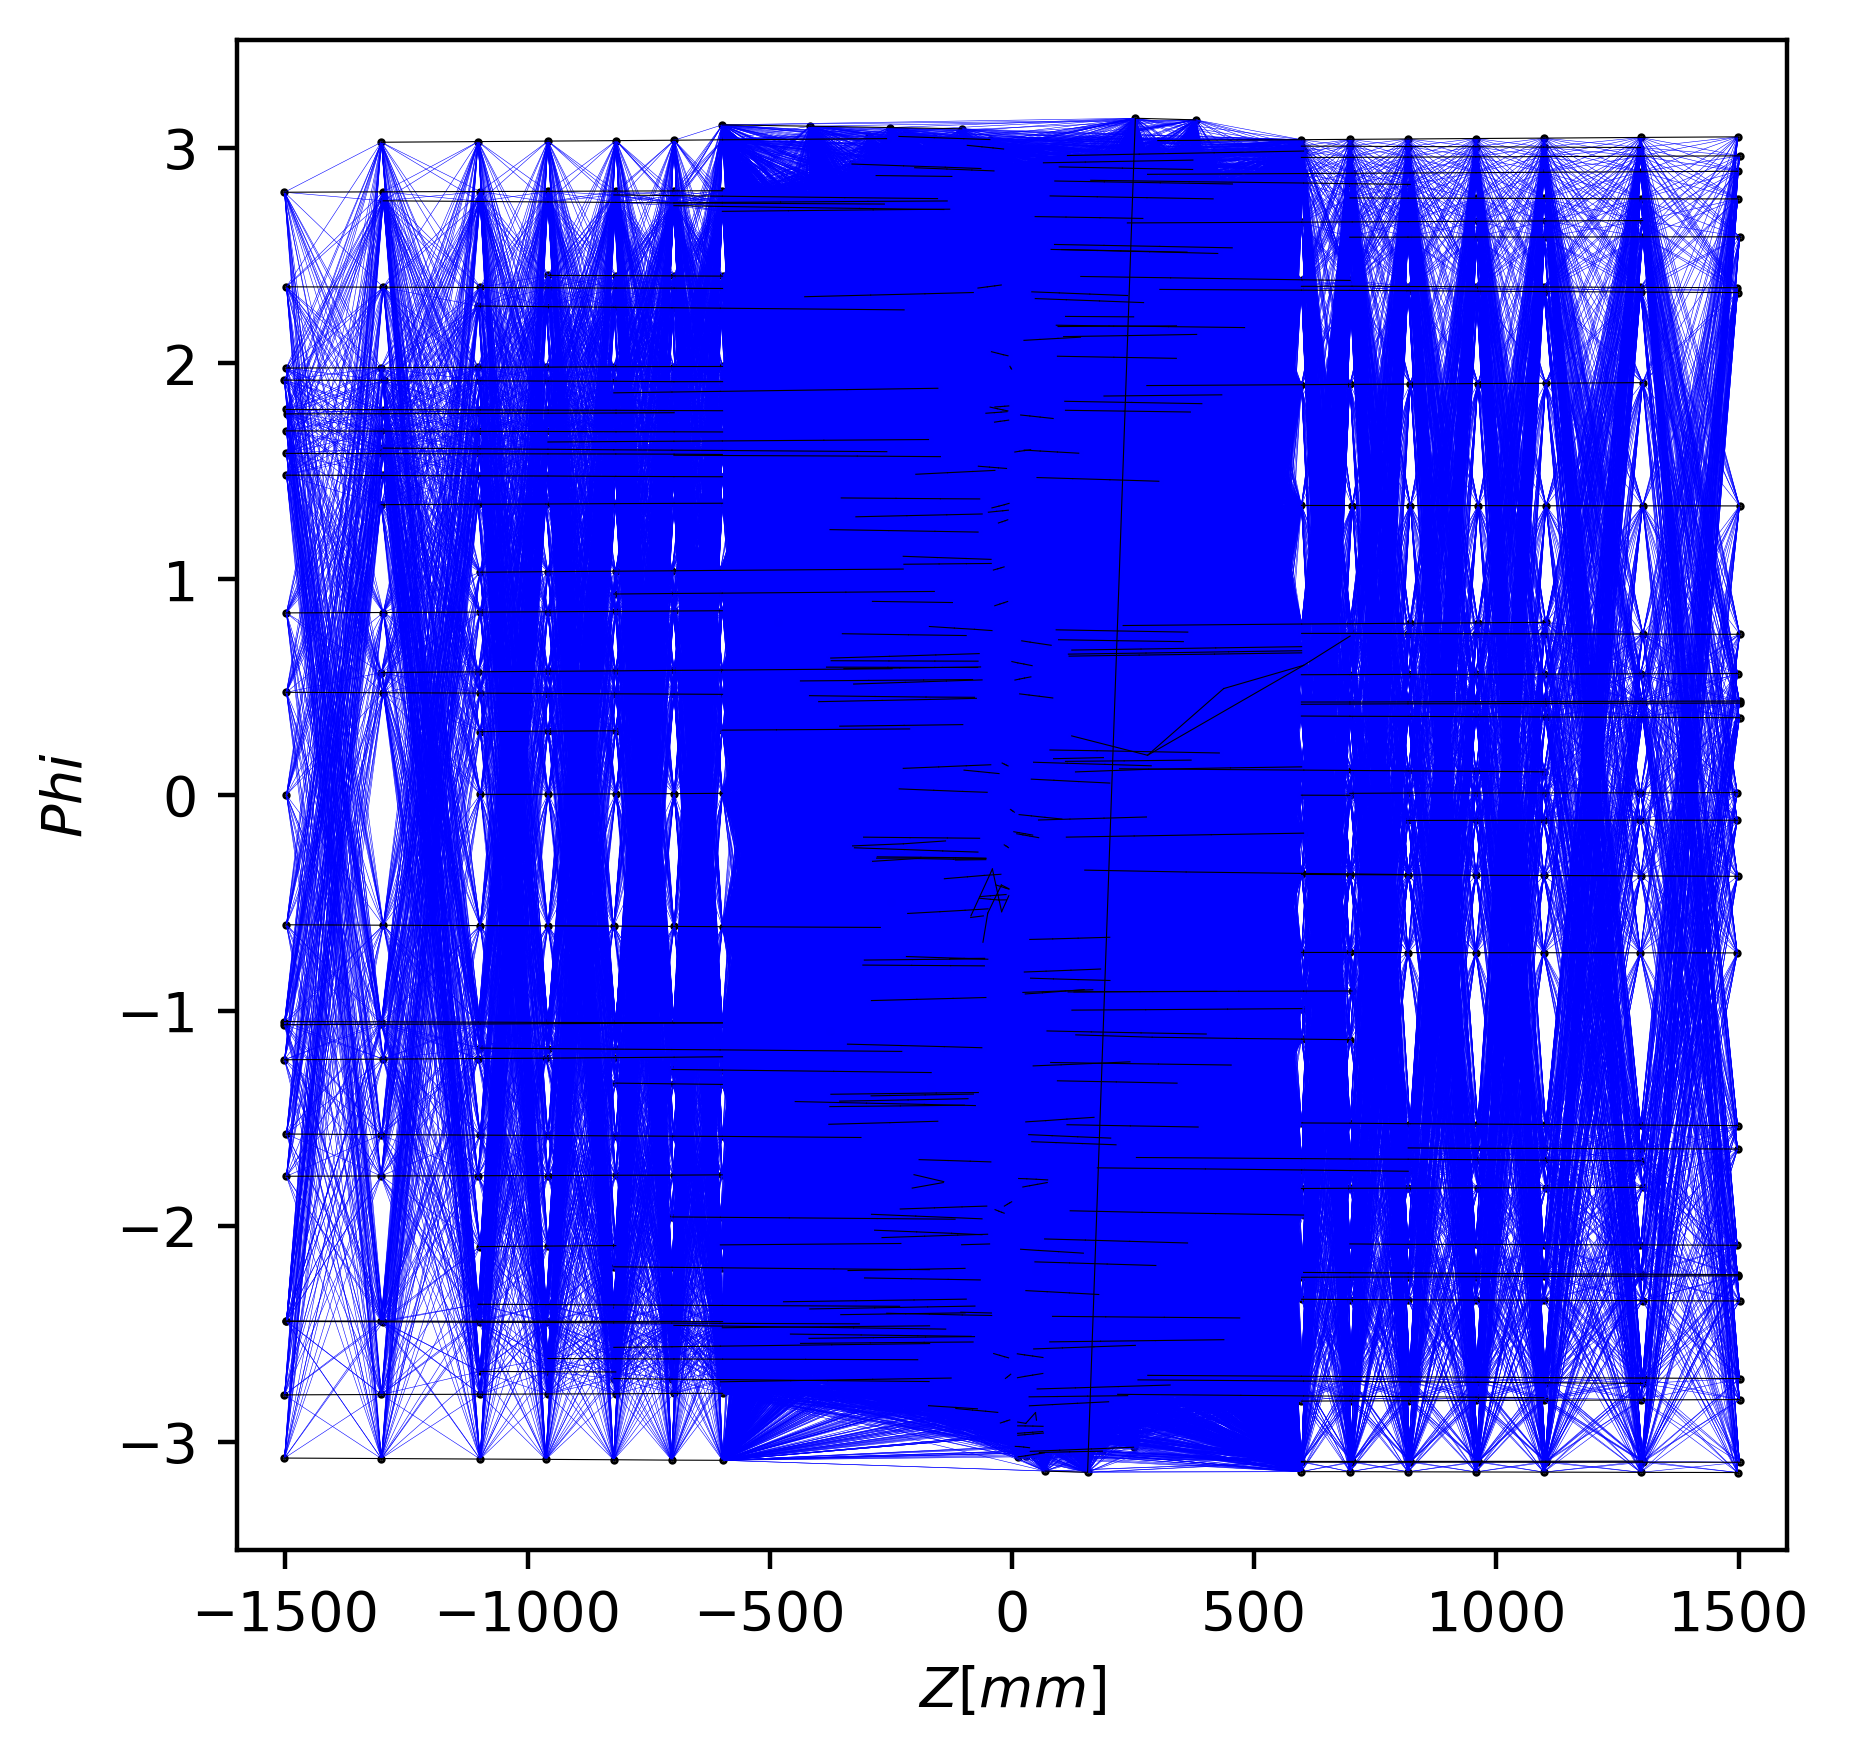

In [18]:
draw_sample(Z_coordinate, '$Z [mm]$', -Z_max, Z_max, 
            Phi_coordinate, '$Phi$', -3.5, 3.5)

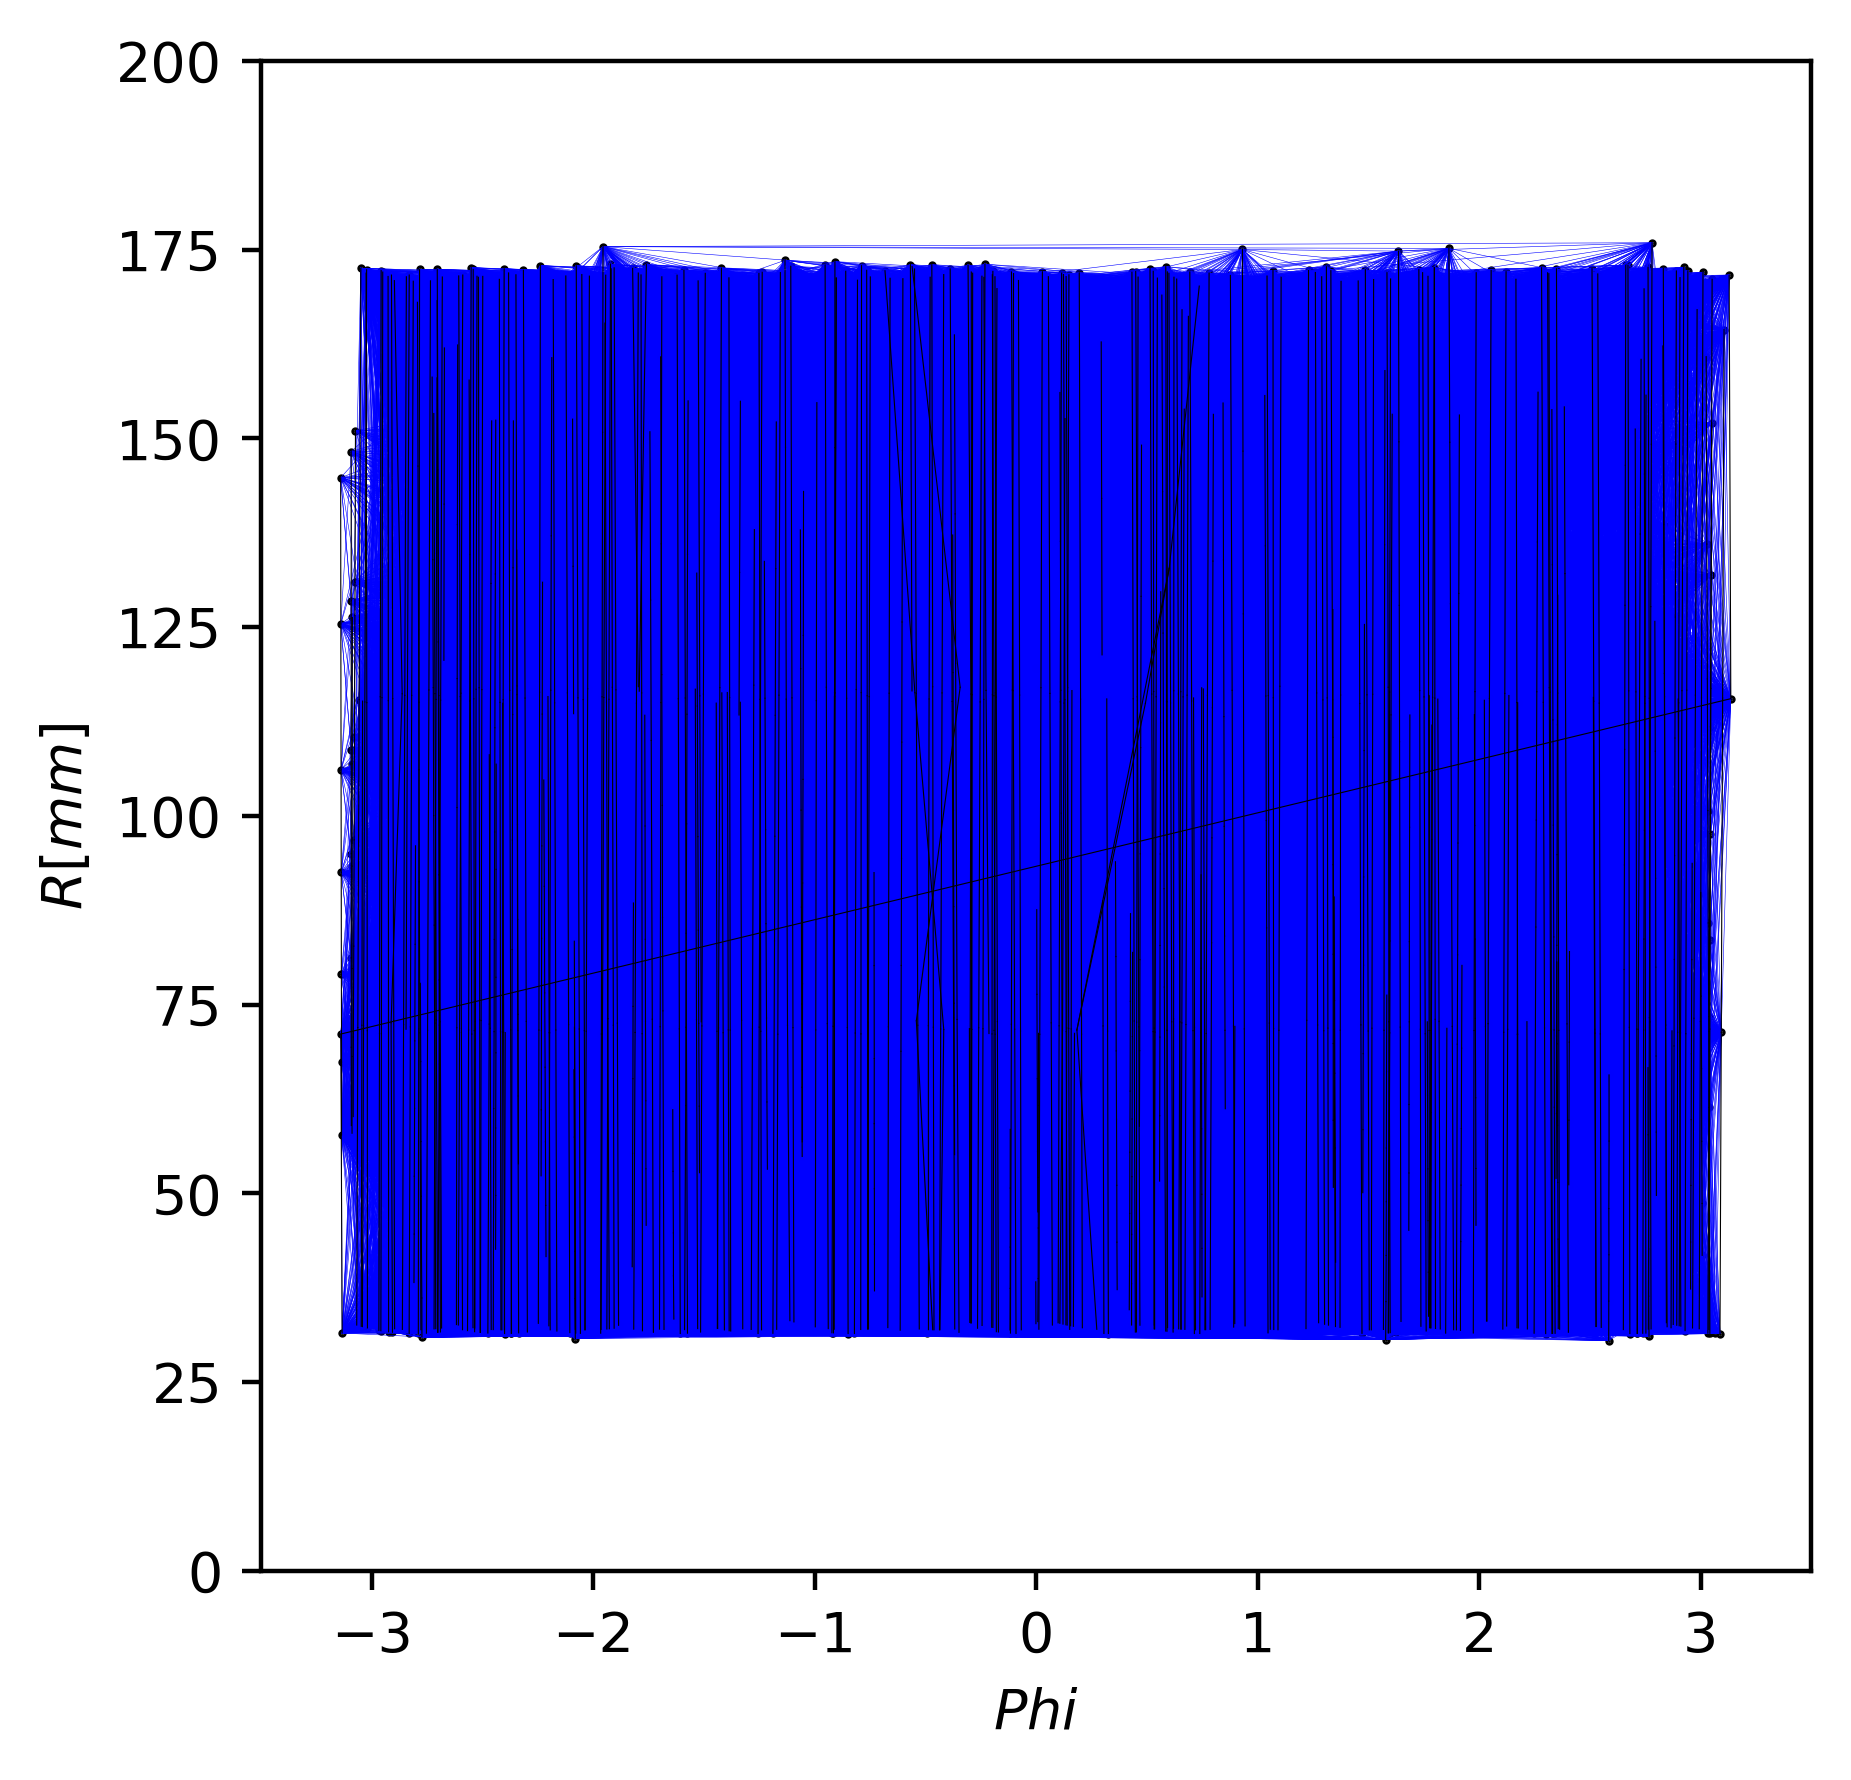

In [19]:
draw_sample(Phi_coordinate, '$Phi$', -3.5, 3.5, 
            R_coordinate, '$R [mm]$', 0, R_max)